In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_text(s : str):
    s = s.lower()
    for ch in s:
        if not(ord(ch) >= ord('a') and ord(ch) <= ord('z') or ord(ch) >= ord('а') and ord(ch) <= ord('я')):
            s = s.replace(ch, ' ', 1)
    words = s.split()
    for w in words:
        if (len(w) <= 2):
            words.remove(w)
    words = list(map(lambda w: w[:-2] if (len(w) >= 6) else w, words))
    return words

In [3]:
s = 'sdlkgn LDKSNF: SD, dfgjk'
print(parse_text(s))

['sdlk', 'ldks', 'dfgjk']


In [4]:
docs = ['Британская полиция знает о местонахождении основателя WikiLeaks',
        'В суде США начинается процесс против россиянина, рассылавшего спам',
        'Церемонию вручения Нобелевской премии мира бойкотируют 19 стран',
        'В Великобритании арестован основатель сайта Wikileaks Джулиан Ассандж',
        'Украина игнорирует церемонию вручения Нобелевской премии',
        'Шведский суд отказался рассматривать апелляцию основателя Wikileaks',
        'НАТО и США разработали планы обороны стран Балтии против России',
        'Полиция Великобритании нашла основателя WikiLeaks, но, не арестовала',
        'В Стокгольме и Осло сегодня состоится вручение Нобелевских премий']

In [5]:
new_docs = docs.copy()
for i in range(len(docs)):
  new_docs[i] = parse_text(docs[i])

In [6]:
print(new_docs)

[['британск', 'полиц', 'знает', 'местонахожден', 'основате', 'wikilea'], ['суде', 'сша', 'начинает', 'проце', 'прот', 'россияни', 'рассылавше', 'спам'], ['церемон', 'вручен', 'нобелевск', 'прем', 'мира', 'бойкотиру', 'стран'], ['великобритан', 'арестов', 'основате', 'сайта', 'wikilea', 'джули', 'ассан'], ['украи', 'игнориру', 'церемон', 'вручен', 'нобелевск', 'прем'], ['шведск', 'суд', 'отказал', 'рассматрива', 'апелляц', 'основате', 'wikilea'], ['нато', 'сша', 'разработа', 'планы', 'оборо', 'стран', 'балт', 'прот', 'росс'], ['полиц', 'великобритан', 'нашла', 'основате', 'wikilea', 'не', 'арестова'], ['стокголь', 'осло', 'сегод', 'состоит', 'вручен', 'нобелевск', 'прем']]


In [7]:
words = []
for i in range(len(new_docs)):
  words = words + new_docs[i]
words = list(set(words))
print(words)

['британск', 'ассан', 'рассматрива', 'спам', 'украи', 'отказал', 'сша', 'церемон', 'апелляц', 'росс', 'сегод', 'бойкотиру', 'россияни', 'начинает', 'осло', 'wikilea', 'нашла', 'планы', 'не', 'основате', 'арестов', 'состоит', 'суд', 'местонахожден', 'мира', 'нато', 'стран', 'рассылавше', 'стокголь', 'разработа', 'суде', 'полиц', 'сайта', 'вручен', 'прем', 'оборо', 'джули', 'арестова', 'нобелевск', 'прот', 'игнориру', 'балт', 'шведск', 'знает', 'великобритан', 'проце']


In [8]:
M = [[0 for i in range(len(new_docs))] for j in range(len(words))]
S = [0 for j in range(len(words))]
for i in range(len(new_docs)):
  for j in range(len(words)):
    if (words[j] in new_docs[i]):
      S[j] += 1
    M[j][i] = new_docs[i].count(words[j])

In [9]:
print(M)

[[1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 

In [10]:
M1 = [[M[j][i] for i in range(len(new_docs)) if S[j] > 1] for j in range(len(words))]

In [11]:
print(M1)

[[], [], [], [], [], [], [0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0], [], [], [], [], [], [], [], [1, 0, 0, 1, 0, 1, 0, 1, 0], [], [], [], [1, 0, 0, 1, 0, 1, 0, 1, 0], [], [], [], [], [], [], [0, 0, 1, 0, 0, 0, 1, 0, 0], [], [], [], [], [1, 0, 0, 0, 0, 0, 0, 1, 0], [], [0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 1], [], [], [], [0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0, 0], [], [], [], [], [0, 0, 0, 1, 0, 0, 0, 1, 0], []]


In [12]:
while([] in M1):
  M1.remove([])

In [13]:
print(M1)

[[0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0]]


In [14]:
M2 = np.reshape(M1, (9, len(M1)))
M2

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

In [15]:
U, S, Vh = np.linalg.svd(M2, full_matrices=True)
S

array([3.87555887e+00, 2.24213211e+00, 1.84532826e+00, 1.59220082e+00,
       1.35110399e+00, 9.14301397e-01, 5.07316466e-01, 3.06183294e-01,
       2.07515151e-17])

In [16]:
print(np.size(U))

81


In [17]:
U1 = U[:, :2]
U1

array([[ 0.14728586, -0.14241818],
       [ 0.19381213,  0.69069654],
       [ 0.55332241, -0.06112012],
       [ 0.28537081, -0.41477789],
       [ 0.22015521, -0.19592594],
       [ 0.39050453,  0.39506582],
       [ 0.46830258, -0.15436399],
       [ 0.33316721,  0.13480582],
       [ 0.14789096, -0.30068947]])

In [18]:
U1[1]

array([0.19381213, 0.69069654])

In [19]:
U2 = U[:2, :]
U2

array([[ 1.47285864e-01, -1.42418184e-01, -4.17976210e-01,
         3.30070050e-01, -3.96375680e-01, -7.00852827e-01,
         8.71033370e-02, -1.35934649e-01, -8.77222996e-17],
       [ 1.93812132e-01,  6.90696538e-01,  1.36326699e-01,
         5.28815423e-01,  3.64273601e-01, -1.33376954e-01,
         1.70950693e-01,  8.62300495e-02, -7.25785735e-17]])

In [20]:
U2.T

array([[ 1.47285864e-01,  1.93812132e-01],
       [-1.42418184e-01,  6.90696538e-01],
       [-4.17976210e-01,  1.36326699e-01],
       [ 3.30070050e-01,  5.28815423e-01],
       [-3.96375680e-01,  3.64273601e-01],
       [-7.00852827e-01, -1.33376954e-01],
       [ 8.71033370e-02,  1.70950693e-01],
       [-1.35934649e-01,  8.62300495e-02],
       [-8.77222996e-17, -7.25785735e-17]])

In [21]:
x, y = U2
x

array([ 1.47285864e-01, -1.42418184e-01, -4.17976210e-01,  3.30070050e-01,
       -3.96375680e-01, -7.00852827e-01,  8.71033370e-02, -1.35934649e-01,
       -8.77222996e-17])

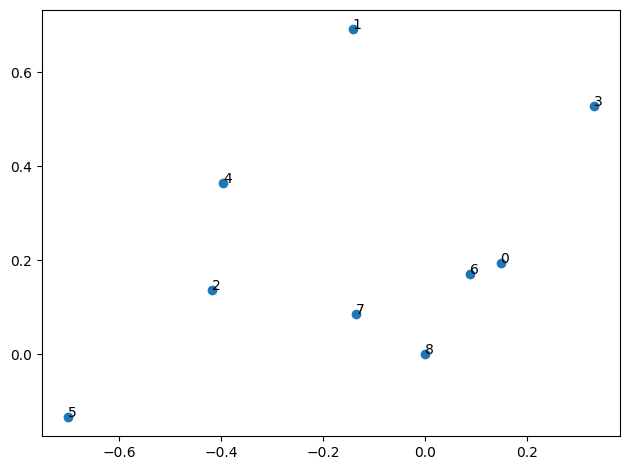

In [22]:
n = np.array(range(9))

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

index = np.arange(5)
data = {'T1': U1[0],
        'T2': U1[1],
        'T3': U1[2],
        'T4': U1[3],
        'T5': U1[4],
        'T6': U1[5],
        'T7': U1[6],
        'T8': U1[7],
        'T9': U1[8]
        }
df1 = pd.DataFrame(data)


In [24]:
df1

,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,0.147286,0.193812,0.553322,0.285371,0.220155,0.390505,0.468303,0.333167,0.147891
1,-0.142418,0.690697,-0.061120,-0.414778,-0.195926,0.395066,-0.154364,0.134806,-0.300689


In [25]:
df2 = df1.T
df2.rename(columns = {0:'x', 1:'y'}, inplace = True)
df2

,x,y
T1,0.147286,-0.142418
T2,0.193812,0.690697
T3,0.553322,-0.061120
T4,0.285371,-0.414778
T5,0.220155,-0.195926
T6,0.390505,0.395066
T7,0.468303,-0.154364
T8,0.333167,0.134806
T9,0.147891,-0.300689


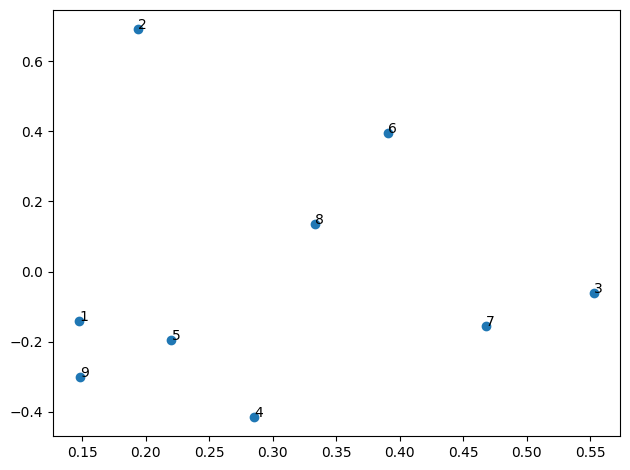

In [26]:
n = np.array(range(1, 10))

fig, ax = plt.subplots()
ax.scatter(df2['x'], df2['y'])

for i, txt in enumerate(n):
    ax.annotate(txt, (df2['x'][i], df2['y'][i]))

plt.tight_layout()
plt.show()

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
import requests
from lxml import html

url_post = 'https://habr.com/ru/post/110078/'
page = requests.get(url_post)
tree = html.fromstring(page.content)

title = tree.xpath('//title')
print(title[0].text)

content_lsa = tree.xpath('//div[@id="post-content-body"]')
post_lsa = content_lsa[0].text_content()
#print(content_lsa[0].text_content())


url_top_weekly = 'https://habr.com/ru/top/weekly/'
page = requests.get(url_top_weekly)
tree = html.fromstring(page.content)

title = tree.xpath('//title')
print(title[0].text)

content = tree.xpath('//a[@class="post__title_link"]/@href')
print(content)



print('-'*10, 'NLP', '-'*10)

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

#print('Load stopwords')
#import nltk
#nltk.download('stopwords')

stemmer = SnowballStemmer("russian")
russian_stopwords = stopwords.words("russian")
#print(post_lsa)
print(' '.join([stemmer.stem(word) for word in post_lsa.split() if word not in russian_stopwords]))


ÐÐ°ÑÐµÐ½ÑÐ½Ð¾-ÑÐµÐ¼Ð°Ð½ÑÐ¸ÑÐµÑÐºÐ¸Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· / Ð¥Ð°Ð±Ñ
ÐÑÑÑÐ¸Ðµ ÑÑÐ°ÑÑÐ¸ Ð·Ð° Ð½ÐµÐ´ÐµÐ»Ñ / Ð¥Ð°Ð±Ñ
[]
---------- NLP ----------
ÐÐ°Ðº Ð½Ð°Ñ Ð¾Ð´Ð¸ÑÑ ÑÐµÐºÑÑÑ Ð¿Ð¾Ñ Ð¾Ð¶Ð¸Ðµ Ð¿Ð¾ ÑÐ¼ÑÑÐ»Ñ? ÐÐ°ÐºÐ¸Ðµ ÐµÑÑÑ Ð°Ð»Ð³Ð¾ÑÐ¸ÑÐ¼Ñ Ð´Ð»Ñ Ð¿Ð¾Ð¸ÑÐºÐ° ÑÐµÐºÑÑÐ¾Ð² Ð¾Ð´Ð½Ð¾Ð¹ ÑÐµÐ¼Ð°ÑÐ¸ÐºÐ¸? â ÐÐ¾Ð¿ÑÐ¾ÑÑ ÑÐµÐ³ÑÐ»ÑÑÐ½Ð¾ Ð²Ð¾Ð·Ð½Ð¸ÐºÐ°ÑÑÐ¸Ðµ Ð½Ð° ÑÐ°Ð·Ð»Ð¸ÑÐ½ÑÑ Ð¿ÑÐ¾Ð³ÑÐ°Ð¼Ð¼Ð¸ÑÑÑÐºÐ¸Ñ ÑÐ¾ÑÑÐ¼Ð°Ñ . Ð¡ÐµÐ³Ð¾Ð´Ð½Ñ Ñ ÑÐ°ÑÑÐºÐ°Ð¶Ñ Ð¾Ð± Ð¾Ð´Ð½Ð¾Ð¼ Ð¸Ð· Ð¿Ð¾Ð´Ñ Ð¾Ð´Ð¾Ð², ÐºÐ¾ÑÐ¾ÑÑÐ¼ Ð°ÐºÑÐ¸Ð²Ð½Ð¾ Ð¿Ð¾Ð»ÑÐ·ÑÑÑÑÑ Ð¿Ð¾Ð¸ÑÐºÐ¾Ð²ÑÐµ Ð³Ð¸Ð³Ð°Ð½ÑÑ Ð¸ ÐºÐ¾ÑÐ¾ÑÑÐ¹ Ð·Ð²ÑÑÐ¸Ñ ÑÐµÐ¼-ÑÐ¾ Ð²ÑÐ¾Ð´Ðµ Ð¼Ð°Ð½ÑÑÑ Ð´Ð»Ñ SEO aka Ð¿Ð¾Ð¸ÑÐºÐ¾Ð²ÑÑ Ð¾Ð¿ÑÐ¸Ð¼Ð¸Ð·Ð°ÑÐ¾ÑÐ¾Ð². Ð­ÑÐ¾Ñ Ð¿Ð¾Ð´Ñ Ð¾Ð´ Ð½Ð°Ð·ÑÐ²Ð°ÐµÑ Ð»Ð°ÑÐµÐ½ÑÐ½Ð¾-ÑÐµÐ¼Ð°Ð½ÑÐ¸ÑÐµÑÐºÐ¸Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· (LSA), Ð¾Ð½ Ð¶Ðµ Ð»Ð°ÑÐµÐ½ÑÐ½Ð¾-ÑÐµÐ¼Ð°Ð½ÑÐ¸ÑÐµÑÐºÐ¾Ðµ Ð¸Ð½Ð´ÐµÐºÑÐ¸ÑÐ¾Ð²Ð°Ð½Ð¸Ðµ (LSI) ÐÑÐµÐ´Ð¿Ð¾Ð»Ð¾Ð¶Ð¸Ð¼, Ð¿ÐµÑÐµÐ´ Ð²Ð°Ð¼Ð¸ ÑÑÐ¾Ð¸Ñ Ð·Ð°Ð´Ð°Ñ